# Contours
1. Open “Micro.jpg”;
2. Use either thresholding or edge detection to create a binary mask;
3. Extract and draw the boundary of the cell by finding the largest
contour in the image.

(np.float64(-0.5), np.float64(477.5), np.float64(367.5), np.float64(-0.5))

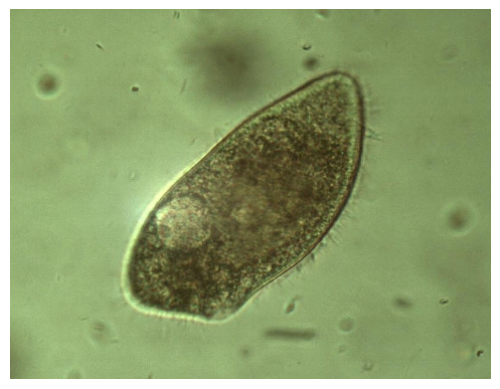

In [184]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import math

I = cv2.imread("Micro.jpg")

I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
Original = I.copy()

plt.imshow(I)
plt.axis('off')

(np.float64(-0.5), np.float64(477.5), np.float64(367.5), np.float64(-0.5))

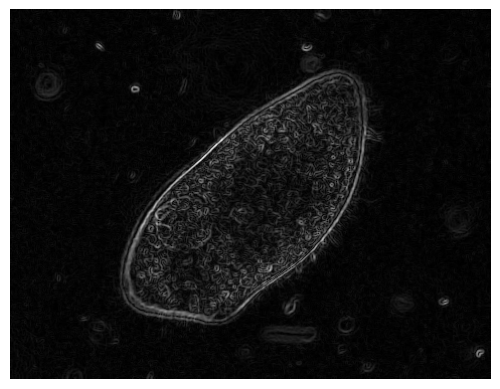

In [185]:
I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

Ix = cv2.Sobel(I,ddepth=cv2.CV_64F,dx=1,dy=0)
Iy = cv2.Sobel(I,ddepth=cv2.CV_64F,dx=0,dy=1)

magnitude = np.sqrt((Ix * Ix) + (Iy * Iy))

plt.imshow(magnitude, cmap="gray")
plt.axis('off')

(np.float64(-0.5), np.float64(477.5), np.float64(367.5), np.float64(-0.5))

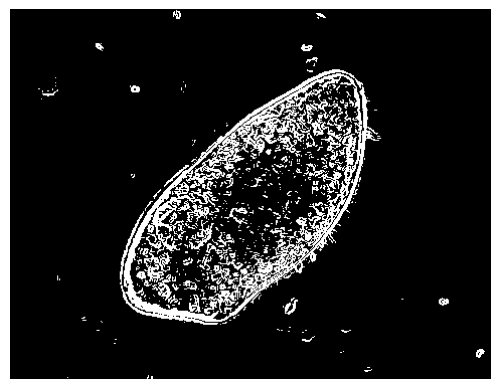

In [186]:
imgThresh = np.mean(magnitude) + 50

imgThresh, output = cv2.threshold(magnitude, thresh = imgThresh, maxval = 255, type = cv2.THRESH_BINARY)

plt.imshow(output, cmap="gray")
plt.axis('off')

(np.float64(-0.5), np.float64(477.5), np.float64(367.5), np.float64(-0.5))

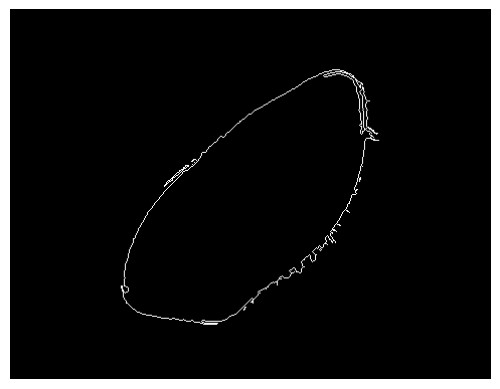

: 

In [ ]:
blank = np.full(output.shape, 0, np.uint8)
blank2 = np.full(output.shape, 0, np.uint8)

contours, uselessMatlike = cv2.findContours(output.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)

largestContour = contours[0]

contourDrawn = cv2.drawContours(blank, largestContour, contourIdx=-1, color=(255,255,255), thickness=1)

plt.imshow(contourDrawn, cmap="gray")
plt.axis('off')